 Importing the Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Loading and Pre-processing

In [2]:
df = pd.read_csv("./mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Checking the number of rows and columns in the dataset
df.shape

(5572, 2)

In [4]:
# Checking if the dataset contains null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

Label Encoding

In [5]:
# Labelling ham mail as 1 and spam as 0
df.replace({'ham': 1, 'spam':0}, inplace = True)

Ham mail - 1
spam mail - 0

In [6]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Separating the data as text and label
x = df['Message']
y = df['Category']

In [8]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [9]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [11]:
# Splitting the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [12]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [13]:
# Transform the text data to feature vectors that can be used as input to the Logistic Regression
features_extraction = TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= True)

In [14]:
x_train_features = features_extraction.fit_transform(x_train)
x_test_features = features_extraction.transform(x_test)

In [15]:
# Convert y_train and y_test values as in integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [16]:
print(x_train_features)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

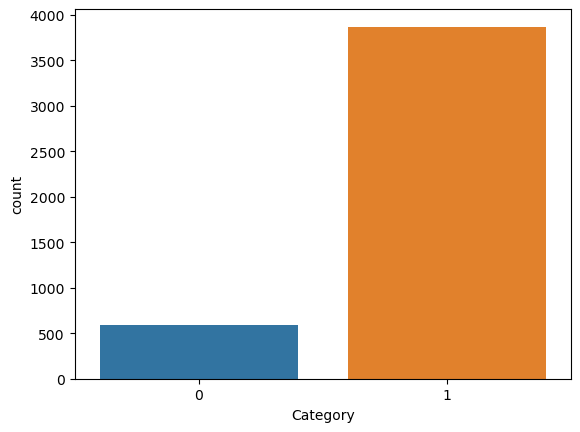

In [17]:
sns.countplot(x = y_train, data = df);

In [18]:
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_features, y_train)

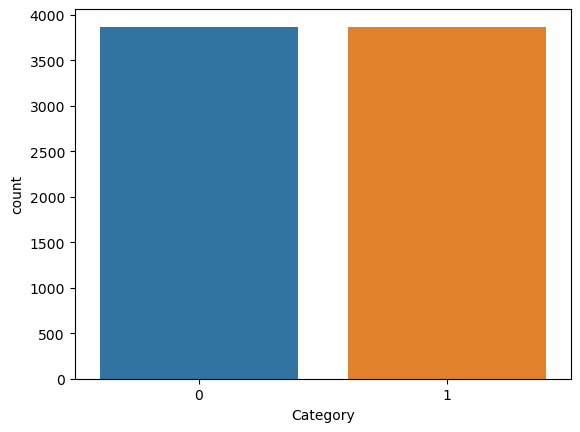

In [19]:
sns.countplot(x = y_train_resampled, data = df);

Training the model

Logistic Regression

In [20]:
model = LogisticRegression()

In [21]:
# Training thre model
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

Evaluating the model

In [22]:
# Prediction on training data
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(prediction_on_training_data, y_train)
print("Accuracy on training data is ", accuracy_on_training_data)

Accuracy on training data is  0.991249719542293


In [23]:
# Prediction on test data
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(prediction_on_test_data, y_test)
print("Accuracy on test data is ", accuracy_on_test_data)

Accuracy on test data is  0.9856502242152466


In [24]:
import pickle

In [25]:
# After training and before closing the script, save the model and vectorizer to files
with open('model_file', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer_file', 'wb') as vectorizer_file:
    pickle.dump(features_extraction, vectorizer_file)


Building a Predictive System

In [26]:
input_mail = ["Ok lar... Joking wif u oni..."]

In [27]:
# Convert text to feature vectors
input_data_feature = features_extraction.transform(input_mail)

In [28]:
# Making Prediction
pred = model.predict(input_data_feature)

if (pred[0] == 1):
  print("Ham Mail")
else:
  print("Spam Mail")

Ham Mail
